
This notebook contains code to train a fully connected deep neural network on MNIST. The principal changes from the previous notebook are:

We have switched from a linear classifier to a deep neural network.

We have added code to visualize the graph and summary data in TensorBoard.

We are using the AdamOptimizer instead of the vanilla GradientDescentOptimizer.

We are using Dropout.

In [71]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import math
import os
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

In [72]:
tf.reset_default_graph()
sees= tf.Session()

In [73]:
#LOGDIR = './graphs/tutorial'

In [74]:
#import the mnist dataset
# It will be downloaded to '/tmp/data' if you don't already have a local copy.

mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz


In [75]:
print ("Train, validation, test: %d, %d, %d" %  (len(mnist.train.images), len(mnist.validation.images), len(mnist.test.images)))

Train, validation, test: 55000, 5000, 10000


In [76]:
# number of neurons in each hidden layer
HIDDEN1_SIZE = 500
HIDDEN2_SIZE = 250

NUM_CLASSES = 10
NUM_PIXELS = 28 * 28

# experiment with the nubmer of training steps to 
# see the effect
TRAIN_STEPS = 2000
BATCH_SIZE = 100

# we're using a different learning rate than the previous
# notebook, and a new optimizer
LEARNING_RATE = 0.001

In [77]:
with tf.name_scope("input"):
    #Define inputs
    images = tf.placeholder(dtype=tf.float32, shape=[None, NUM_PIXELS], name= "pixel")
    print(images.shape)
    labels = tf.placeholder(dtype=tf.float32, shape=[None, NUM_CLASSES], name = "label")
    print(labels.shape)

(?, 784)
(?, 10)


In [78]:
def fully_connected_layer(input, sizeOut, name="fc", activation = None):
    with tf.name_scope("model"):
        sizeIn =int(input.shape[1])
        print(sizeIn)
        w = tf.Variable(tf.truncated_normal([sizeIn, sizeOut], stddev=0.1), name="weights")
        b = tf.Variable(tf.constant(0.1, shape=[sizeOut]), name="bias")
        wx_plus_b = tf.matmul(input, w) + b
        if activation:
            return activation(wx_plus_b)
        return wx_plus_b
        

In [79]:
fc1 = fully_connected_layer(images, HIDDEN1_SIZE, "fc1", activation=tf.nn.relu)
print(fc1.shape)
fc2 = fully_connected_layer(fc1, HIDDEN2_SIZE, "fc2", activation=tf.nn.relu)

dropped = tf.nn.dropout(fc2, keep_prob=0.9)

# Finally, we'll calculate logists. This will be
# the input to our Softmax function. Notice we 
# don't apply an activation at this layer.
# If you've commented out the dropout layer,
# switch the input here to 'fc2'.
y = fully_connected_layer(dropped, NUM_CLASSES, name="output")
print(y.shape)

784
(?, 500)
500
250
(?, 10)


In [ ]:

# Define loss and an optimizer
with tf.name_scope("loss"):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=labels))

with tf.name_scope("optimizer"):
    # Whereas in the previous notebook we used a vanilla GradientDescentOptimizer
    # here, we're using Adam. This is a single line of code change, and more
    # importantly, TensorFlow will still automatically analyze our graph
    # and determine how to adjust the variables to decrease the loss.
    train_step = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)

In [86]:
# Initialize variables after the model is defined
sees.run(tf.global_variables_initializer())

In [87]:
# Train the model
for i in range(TRAIN_STEPS):
    batch_images, batch_labels = mnist.train.next_batch(BATCH_SIZE)
    sees.run(train_step, feed_dict={images: batch_images, labels: batch_labels})

In [88]:
# Evaluate the trained model
with tf.name_scope("calculate"):
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    tf.summary.scalar('accuracy', accuracy)
                                  
print("Accuracy %f" % sees.run(accuracy, feed_dict={images: mnist.test.images, 
                                                    labels: mnist.test.labels}))

Accuracy 0.976000


Predicted: 3, actual: 3


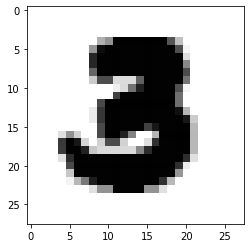

In [91]:
import pylab

prediction = tf.argmax(y,1)

def predict(i):
    image = mnist.test.images[i]
    actual_label = np.argmax(mnist.test.labels[i])
    predicted_label = sees.run(prediction, feed_dict={images: [image]})
    return predicted_label, actual_label

i = 200
predicted, actual = predict(i)
print ("Predicted: %d, actual: %d" % (predicted, actual))
pylab.imshow(mnist.test.images[i].reshape((28,28)), cmap=pylab.cm.gray_r)
    